In [1]:
from google.colab import files
uploaded=files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
# Load the data
df = pd.read_excel("Online Retail.xlsx")
df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0]
df = df[df['InvoiceNo'].astype(str)!= 'C']

df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [18]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Revenue      397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [19]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,15.60
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,23.40
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [16]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
Revenue,float64


In [20]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='object')

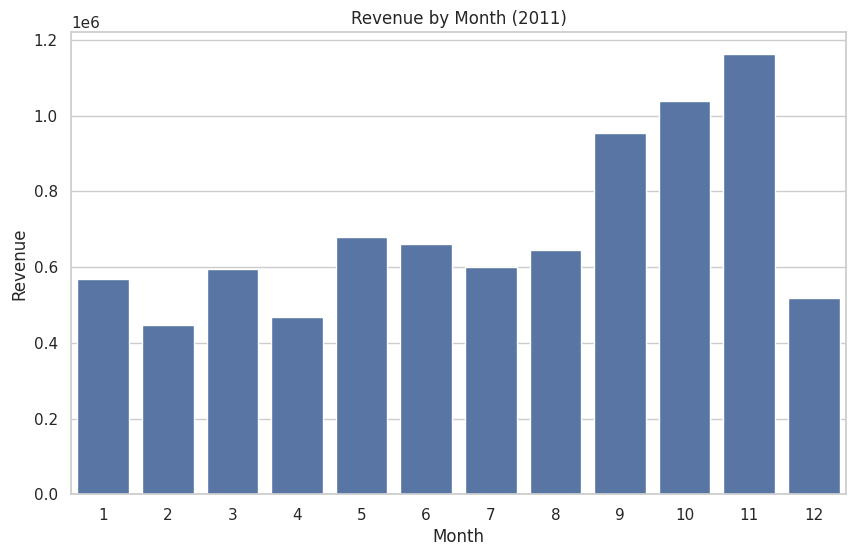

In [7]:
# ---- Revenue By Month for 2011 (Barplot) ----
df_2011 = df[df['InvoiceDate'].dt.year == 2011]
revenue_by_month = df_2011.groupby(df_2011['InvoiceDate'].dt.month)['Revenue'].sum()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=revenue_by_month.index, y=revenue_by_month.values)
plt.title('Revenue by Month (2011)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

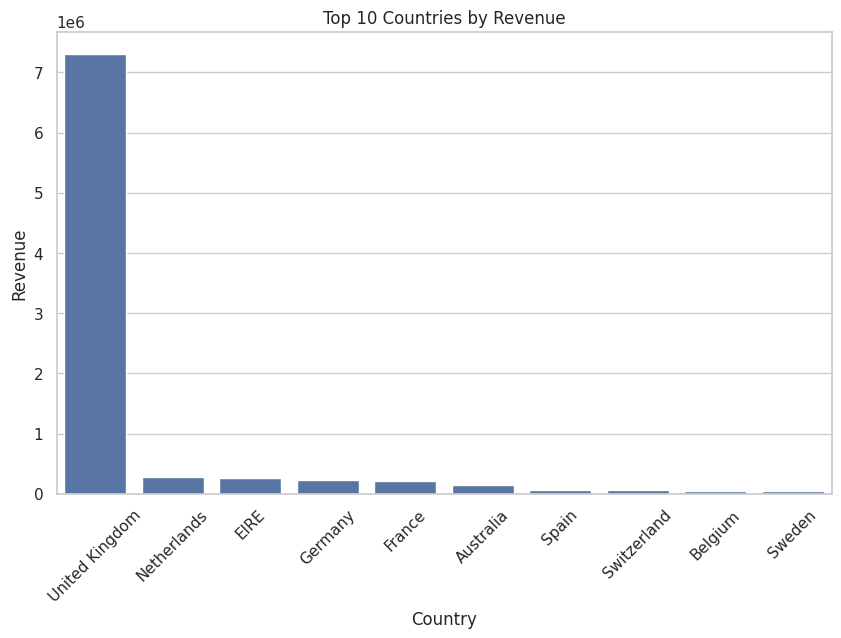

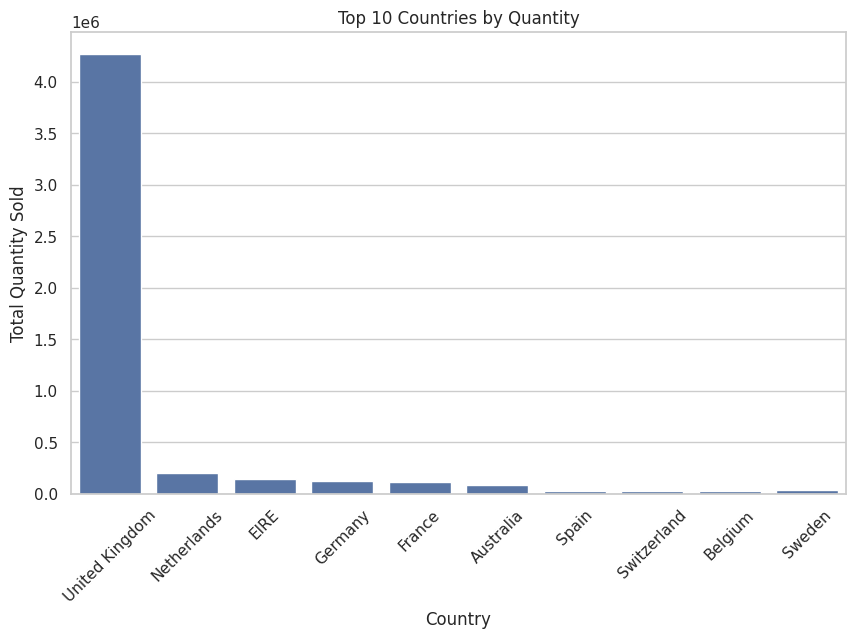

In [8]:
# ---- Top 10 Countries by Revenue and Their Quantity (Barplot) ----
country_agg = df.groupby('Country').agg({'Revenue':'sum', 'Quantity':'sum'})
top10_countries = country_agg.sort_values('Revenue', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10_countries.index, y=top10_countries['Revenue'])
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=top10_countries.index, y=top10_countries['Quantity'])
plt.title('Top 10 Countries by Quantity')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

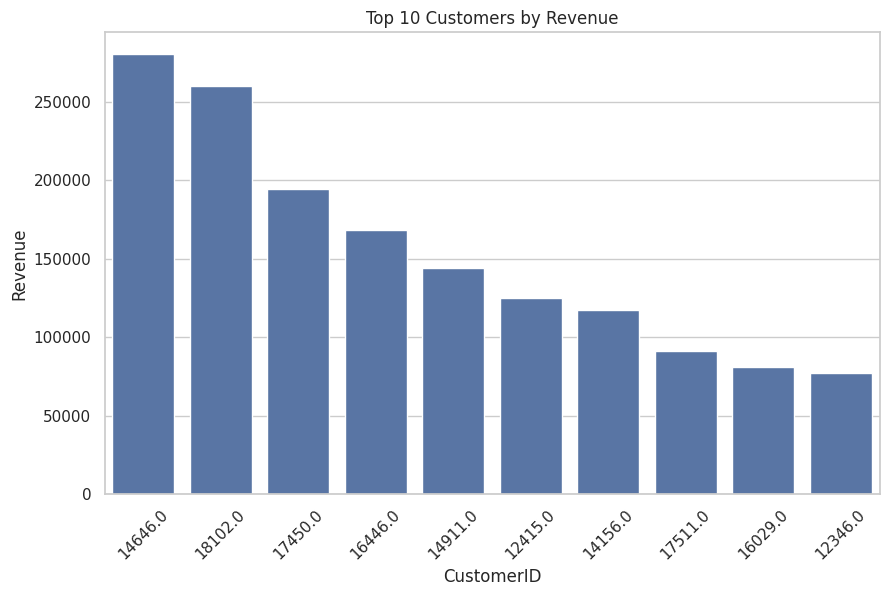

In [11]:
# ---- Top 10 Customers by Revenue (Barplot) ----
customer_revenue = df.groupby('CustomerID')['Revenue'].sum()
top10_customers = customer_revenue.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10_customers.index.astype(str), y=top10_customers.values)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('CustomerID')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [12]:
# ---- Revenue by Country (Choropleth Map) ----
revenue_by_country = df.groupby('Country')['Revenue'].sum().reset_index()

fig = px.choropleth(
    revenue_by_country,
    locations="Country",
    locationmode="country names",
    color="Revenue",
    color_continuous_scale="Viridis",
    title="Revenue by Country"
)
fig.show()